In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
from utils import *

In [64]:
dictionary = np.load('models//n1167_modelRmax.npy').tolist()

In [62]:
def plot_data_lim(ax, data_lim):
    '''Вертикальная линия, обозначающая конец данных'''
    ax.axvline(x=data_lim, ls='-.', color='black', alpha=0.5)
    
def plot_disc_scale(scale, ax, text=None):
    '''Обозначает масштаб диска'''
    ax.plot([scale, scale], [0., 0.05], '-', lw=6., color='black')
    if text:
        ax.annotate(text, xy=(scale, 0.025), xytext=(scale, 0.065), textcoords='data', arrowprops=dict(arrowstyle="->"))
        
def plot_Q_levels(ax, Qs, style='--', color='grey', alpha=0.4):
    '''Функция, чтобы рисовать горизонтальные линии различных уровней $Q^{-1}$:'''
    for Q in Qs:
        ax.axhline(y=1./Q, ls=style, color=color, alpha=alpha)
        
def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ, результат НЕ исправляется за осесимметричные возмущения.'''
    
    Qgs = []
    Qss = []
    invQeff_min = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_max[ind], np.arange(0.01, 60000., 1.))
        invQeff_min.append(qeff[1])


    Qgs = []
    Qss = []
    invQeff_max = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
        invQeff_max.append(qeff[1])
           
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=label)
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6)
    ax.plot(rr, [1./_ for _ in Qgs], 'v-', color='b')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
    plot_Q_levels(ax, [1., 1.5, 2., 3.])
    ax.legend()

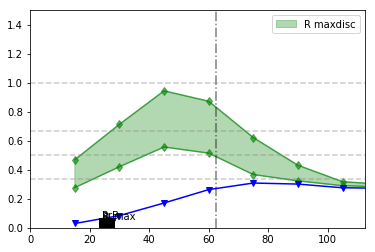

In [65]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);

In [66]:
dictionary = np.load('models//n1167_modelRsubmax.npy').tolist()

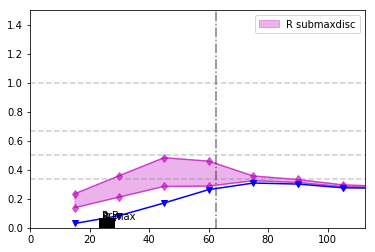

In [67]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);